In [166]:
# Miniproject with data from nme over EEG data
import numpy as np
import matplotlib.pyplot as plt
import mne
import os
import re
import torch

In [167]:

path_to_save = '../data/full_data'
pattern = r'S\d{3}R\d{2}\.edf'

In [168]:
# dataset = mne.datasets.eegbci.load_data(subjects = np.arange(1,110) , runs = [4,8,12], path=path_to_save, force_update=False, update_path=False, base_url='https://physionet.org/files/eegmmidb/1.0.0/', verbose=None)

In [169]:
files = os.listdir(path_to_save)
print(files)

['S038', 'S007', 'S031', 'S009', 'S036', 'S008', 'S037', 'S030', 'S039', 'S006', 'S001', 'S023', 'S024', 'S012', 'S015', 'S040', 'S014', 'S013', 'S025', 'S022', 'S004', 'S003', 'S035', 'S032', 'S033', 'S034', 'S002', 'S005', 'S027', 'S018', 'S020', 'S016', 'S029', 'S011', 'S010', 'S017', 'S028', 'S021', 'S026', 'S019']


In [170]:
path_to_datasets = []
raw_datasets = []
for i in range(len(files)):
    if files[i].startswith('S'):
        for i in range(3):
            if i == 0:
                f = files[i]+"R04.edf"
            elif i == 1:
                f = files[i]+"R08.edf"
            else:
                f = files[i]+"R12.edf"
            path_to_dataset = os.path.join(path_to_save, files[i], f)
            path_to_datasets.append(path_to_dataset)
            print(path_to_dataset)
            raw_dataset= mne.io.read_raw_edf(path_to_dataset, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, include=None, preload=False, units=None, encoding='utf8', exclude_after_unique=False, verbose=None)
            raw_datasets.append(raw_dataset)

../data/full_data/S038/S038R04.edf
Extracting EDF parameters from /Users/bhanuprakash/Library/Mobile Documents/com~apple~CloudDocs/MIS/Sem 3/Advanced ML/Mini Project/data/full_data/S038/S038R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
../data/full_data/S007/S007R08.edf
Extracting EDF parameters from /Users/bhanuprakash/Library/Mobile Documents/com~apple~CloudDocs/MIS/Sem 3/Advanced ML/Mini Project/data/full_data/S007/S007R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
../data/full_data/S031/S031R12.edf
Extracting EDF parameters from /Users/bhanuprakash/Library/Mobile Documents/com~apple~CloudDocs/MIS/Sem 3/Advanced ML/Mini Project/data/full_data/S031/S031R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
../data/full_data/S038/S038R04.edf
Extracting EDF parameters from /Users/bhanuprakash/Library/Mobile Documents/com~apple~CloudDocs/MIS/Sem 3/Advance

In [171]:
path_to_datasets

['../data/full_data/S038/S038R04.edf',
 '../data/full_data/S007/S007R08.edf',
 '../data/full_data/S031/S031R12.edf',
 '../data/full_data/S038/S038R04.edf',
 '../data/full_data/S007/S007R08.edf',
 '../data/full_data/S031/S031R12.edf',
 '../data/full_data/S038/S038R04.edf',
 '../data/full_data/S007/S007R08.edf',
 '../data/full_data/S031/S031R12.edf',
 '../data/full_data/S038/S038R04.edf',
 '../data/full_data/S007/S007R08.edf',
 '../data/full_data/S031/S031R12.edf',
 '../data/full_data/S038/S038R04.edf',
 '../data/full_data/S007/S007R08.edf',
 '../data/full_data/S031/S031R12.edf',
 '../data/full_data/S038/S038R04.edf',
 '../data/full_data/S007/S007R08.edf',
 '../data/full_data/S031/S031R12.edf',
 '../data/full_data/S038/S038R04.edf',
 '../data/full_data/S007/S007R08.edf',
 '../data/full_data/S031/S031R12.edf',
 '../data/full_data/S038/S038R04.edf',
 '../data/full_data/S007/S007R08.edf',
 '../data/full_data/S031/S031R12.edf',
 '../data/full_data/S038/S038R04.edf',
 '../data/full_data/S007/

In [172]:
raw_datasets[0]

<RawEDF | S038R04.edf, 64 x 19680 (123.0 s), ~53 KiB, data not loaded>

In [173]:
len(raw_datasets[0].info['ch_names'])

64

In [174]:
print(len(raw_datasets))

120


In [175]:
raw_datasets[0].get_data()

array([[-2.3e-05, -2.5e-05, -1.8e-05, ...,  5.0e-05, -3.0e-06, -7.0e-06],
       [-3.2e-05, -3.3e-05, -1.6e-05, ...,  1.0e-05, -1.2e-05,  1.0e-06],
       [-3.8e-05, -2.9e-05, -6.0e-06, ...,  5.0e-06, -1.3e-05, -2.0e-06],
       ...,
       [ 2.4e-05,  3.5e-05,  1.3e-05, ...,  4.0e-06,  7.0e-06,  9.0e-06],
       [ 8.0e-06,  2.2e-05,  5.0e-06, ...,  1.0e-06,  1.4e-05,  1.1e-05],
       [-1.0e-05, -5.0e-06, -2.4e-05, ...,  8.0e-06,  6.0e-06,  4.0e-06]],
      shape=(64, 19680))

In [176]:
data_list = [] # list of tuple of (data, times) for all subjects
for i in range(len(raw_datasets)):
    if i<30:
        data = raw_datasets[i].get_data(return_times=True)
        data_list.append(data)


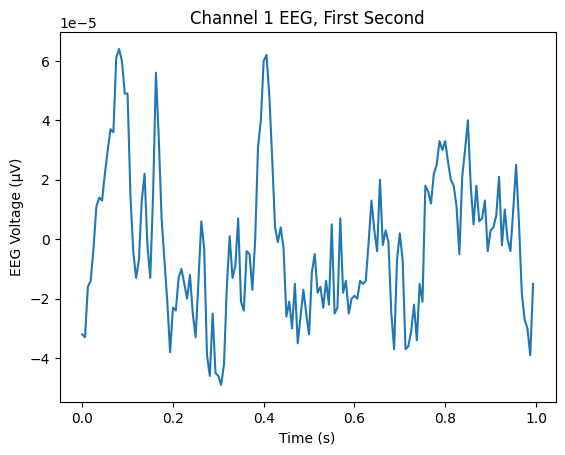

In [177]:
# Plot 1 second of EEG for channel 1
plt.plot(data_list[0][1][:160], data_list[0][0][1:2,:160].reshape(-1))
plt.xlabel("Time (s)")
plt.ylabel("EEG Voltage (µV)")
plt.title("Channel 1 EEG, First Second")
plt.show()

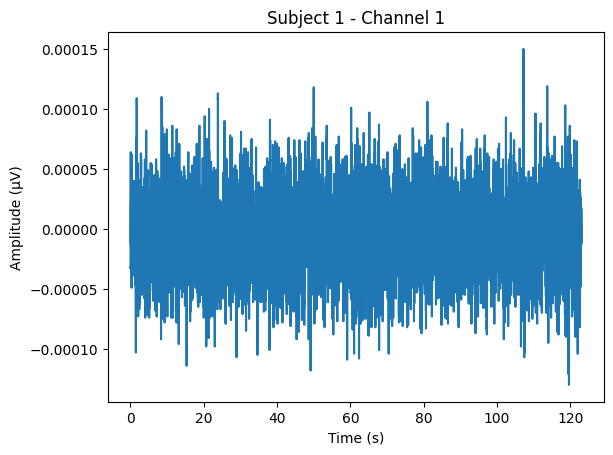

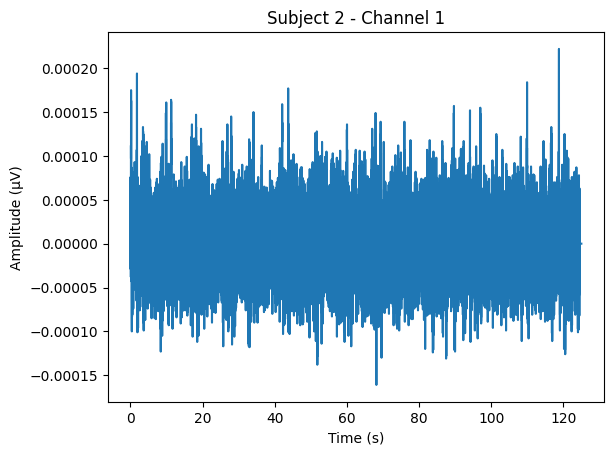

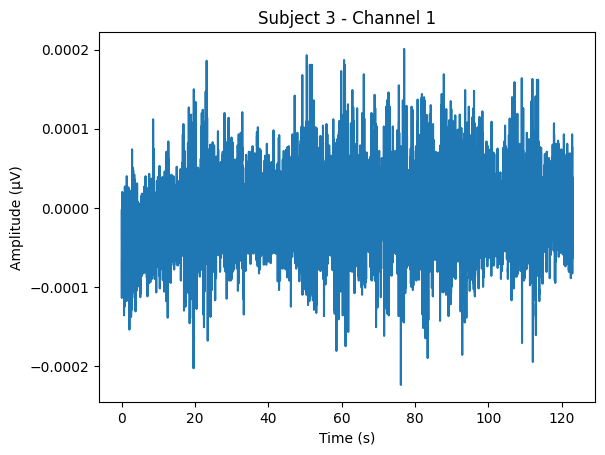

In [178]:
#raw_dataset.plot()
for i in range(3):
    plt.plot(data_list[i][1], data_list[i][0][1:2,:].reshape(-1))
    plt.title(f'Subject {i+1} - Channel 1')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')    
    plt.show()

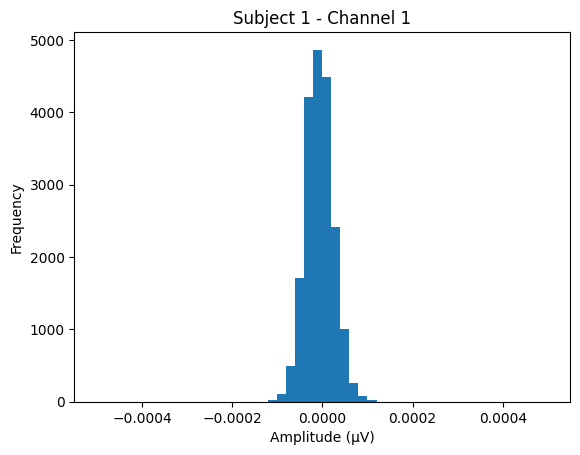

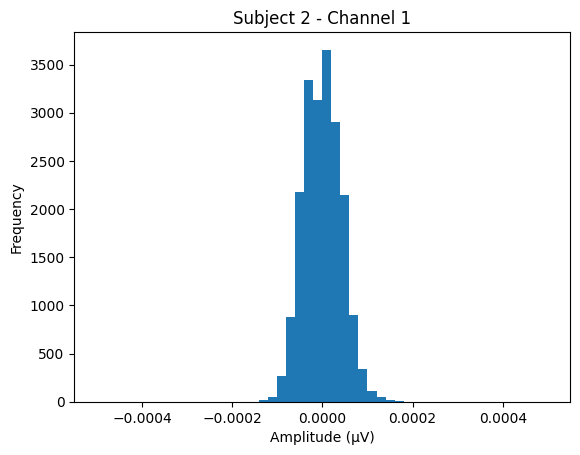

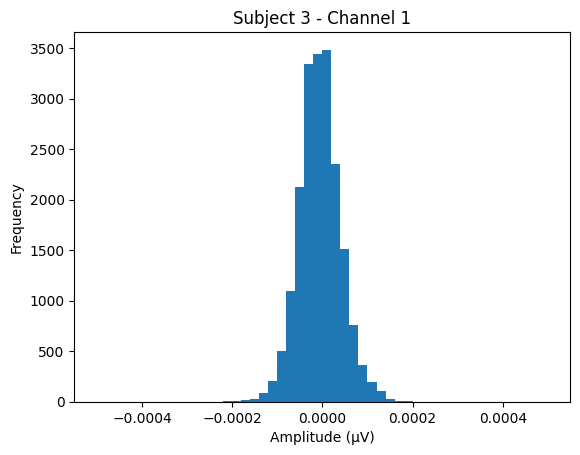

In [179]:
#raw_dataset.plot()
for i in range(3):
    plt.hist(data_list[i][0][1:2,:].reshape(-1), bins=50, range=(-0.0005, 0.0005))
    plt.title(f'Subject {i+1} - Channel 1')
    plt.xlabel('Amplitude (µV)')
    plt.ylabel('Frequency')    
    plt.show()

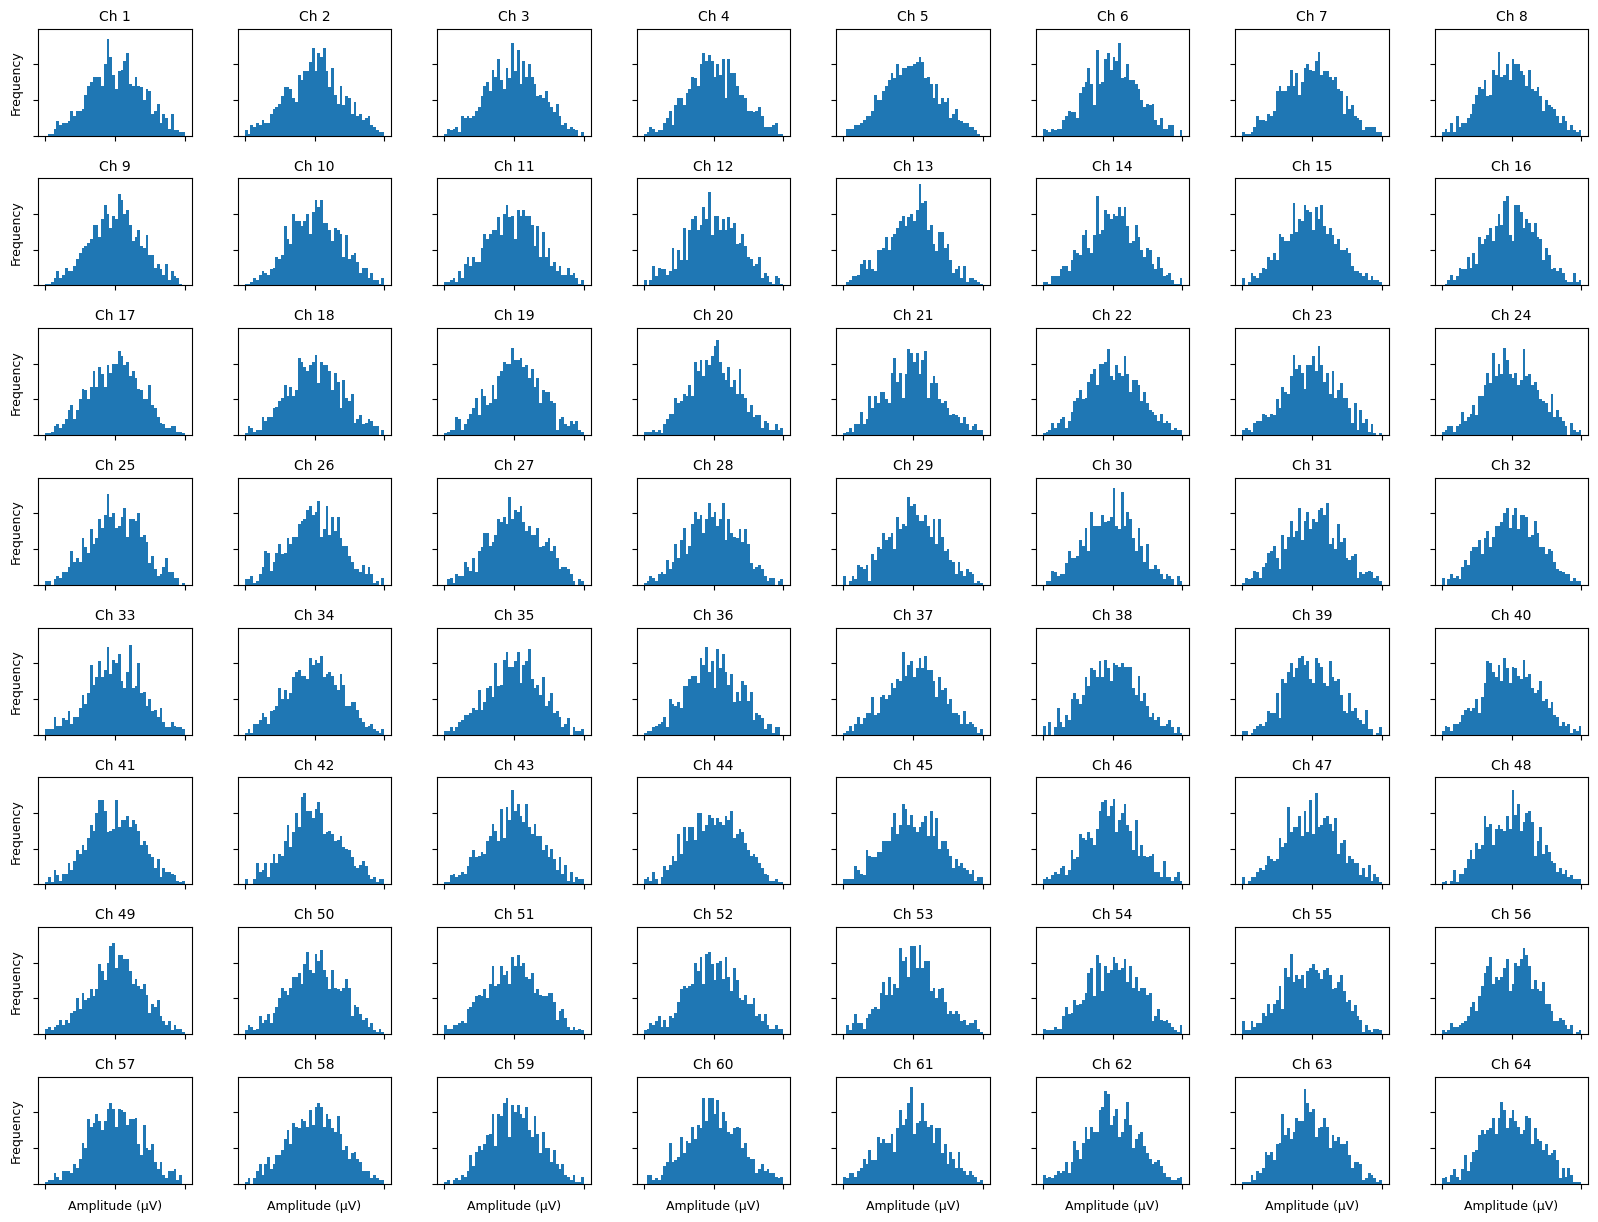

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# Example data shape: 64 channels, 1000 samples each
# data_list[1][0] is assumed to be (64, n_samples)
data = np.random.randn(64, 1000) * 0.0002  # replace with your actual data

fig, axes = plt.subplots(8, 8, figsize=(20, 15), sharex=True, sharey=True)

for i in range(64):
    row = i // 8
    col = i % 8
    ax = axes[row, col]
    
    ax.hist(data[i, :].reshape(-1), bins=50, range=(-0.0005, 0.0005))
    ax.set_title(f'Ch {i+1}', fontsize=10)
    
    # Only left column shows y-label
    if col == 0:
        ax.set_ylabel('Frequency', fontsize=9)
    else:
        ax.set_yticklabels([])  # hide y-ticks for other columns
    
    # Only bottom row shows x-label
    if row == 7:
        ax.set_xlabel('Amplitude (µV)', fontsize=9)
    else:
        ax.set_xticklabels([])  # hide x-ticks for other rows

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()
